In [1]:
import sys
sys.path.append("../../../")

from context_exploration.model.loader import get_run_directory, load_config
from context_exploration.data.envs import make_env
from context_exploration.evaluation.process_calibration import plot_calibration_results

from IPython import display
import pickle as pkl
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
mpl.rcParams.update({'font.size': 12})

fig_scale = 1.8

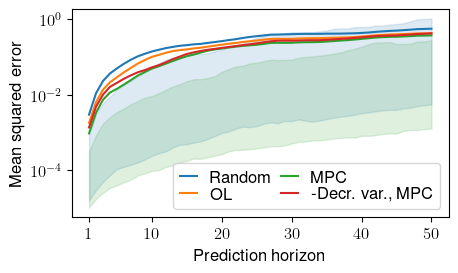

In [2]:
ID_LIST_RELU = [f"cr_s{s}_mountaincar_posweights_relu_npklw5" for s in [1,2,3]]
ID_LIST_FALSE = [f"cr_s{s}_mountaincar_posweights_False_npklw5" for s in [1,2,3]]

runs = [
    {
        "id_list": ID_LIST_RELU,
        "label": "",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 50,
        "n_env_inits": 1,
        "cem_planning_horizon": 30,
        "has_minmax": ["rand", "mpc"]
    },
    {
        "id_list": ID_LIST_FALSE,
        "label": "-Decr. var.",
        "plot_opts": {"linestyle": "-"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 50,
        "n_env_inits": 1,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
]

data_ablation_runs = [
    {
        "id_list": ID_LIST_RELU,
        "label": "100T, 1R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 100,
        "n_env_inits": 1,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "100T, 3R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 100,
        "n_env_inits": 3,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "50T, 1R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 50,
        "n_env_inits": 1,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "50T, 3R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 50,
        "n_env_inits": 3,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "20T, 1R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 20,
        "n_env_inits": 1,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "20T, 3R",
        "plot_opts": {"linestyle": "-"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 20,
        "n_env_inits": 3,
        "cem_planning_horizon": 30,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
]

plot_calibration_results(runs, fig_scale=fig_scale, aggregation="mean", legend=True, legend_kwargs={"ncol": 2, "loc": "lower right"})
plt.savefig("generated/mountaincar_random_vs_mpc_results.pdf", bbox_inches="tight")

#plot_calibration_results(data_ablation_runs, fig_scale=fig_scale, aggregation="mean", legend=True, legend_kwargs={"ncol": 2})
#plt.savefig("generated/mountaincar_rt_ablation.pdf", bbox_inches="tight")

In [3]:
run_id = "cr_s1_mountaincar_posweights_relu_npklw5"
checkpoint_step = "100000_best"
criterion = "neg-entropy"
calibration_rollout_length = 50
n_env_inits = 1
cem_planning_horizon = 30
run_directory = get_run_directory(run_id)
config = load_config(run_id)
env_name = config["env_name"]
env = make_env(env_name)
print(config)

{'batchsize': 512, 'context_dim': 16, 'context_encoder_classname': 'MLPContextEncoder', 'context_encoder_kwargs': {'aggregation_type': 'max', 'clamp_softplus_weights': True, 'latent_dim': 128, 'mean_feature_bidding': 'none', 'positive_weights': 'relu', 'rescale_raw_stddev': True}, 'ctx_from_train_prob_schedule': 'linear', 'debug': False, 'embedding_dim': 200, 'env_name': 'mountaincar', 'grad_clip_norm': 1000, 'inference_approx': 'np', 'kl_all_factor': 0, 'kl_empty_factor': 1.0, 'kl_np_weight': 5, 'learning_rate': 0.001, 'max_ctx_card': 50, 'n_rollouts_train': 50000, 'n_rollouts_val': 10000, 'n_training_steps': 100000, 'obs_n_transitions': 50, 'seed': 1, 'sequence_logll_weight': 1, 'transition_model_classname': 'GruTransitionModel', 'transition_model_kwargs': {'big_nets': False, 'hidden_dependent_noise': True}}


In [4]:
calib_data_filename = (
    f"calibration_data_mpc_"
    f"{criterion}_"
    f"step{checkpoint_step}_"
    f"length{calibration_rollout_length}_"
    f"nenvinits{n_env_inits}_"
    f"{f'cemhorizon{cem_planning_horizon}_' if cem_planning_horizon != 20 else ''}"
    f"nctx50.pkl"
)
with open(run_directory.joinpath(calib_data_filename), "rb") as handle:
    rollouts = pkl.load(handle)

/tmp/ipykernel_40902/2193221191.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgb = cm.get_cmap("spring")(np.linspace(0, 1, len(rollout_x_mpc)))


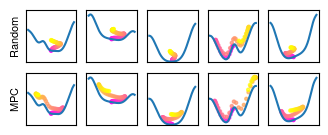

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(5.4*0.7, 1.5))

for rollout_idx in range(5):
    context_seed = rollouts[rollout_idx]["context_seed"]
    env.initialize_context(context_seed)
    x = np.linspace(-1, 1, 200)
    profile = env.profile_fcn(x)
    rollout_x_mpc = rollouts[rollout_idx]["calibration_rollout_mpc"][0]["observation"][:, 0]
    rollout_y_mpc = env.profile_fcn(rollout_x_mpc) + np.linspace(0, 0.2, len(rollout_x_mpc))
    rollout_x_random = rollouts[rollout_idx]["calibration_rollout_random"][0]["observation"][:, 0]
    rollout_y_random = env.profile_fcn(rollout_x_random) + np.linspace(0, 0.2, len(rollout_x_random))
    env.release_context()
    
    rgb = cm.get_cmap("spring")(np.linspace(0, 1, len(rollout_x_mpc)))
    ax[0, 0].set_ylabel("Random", fontsize=8)
    ax[1, 0].set_ylabel("MPC", fontsize=8)
    ax[0, rollout_idx].plot(x, profile)
    ax[0, rollout_idx].scatter(rollout_x_random, rollout_y_random, s=5, c=rgb, alpha=0.7)
    ax[1, rollout_idx].plot(x, profile)
    ax[1, rollout_idx].scatter(rollout_x_mpc, rollout_y_mpc, s=5, c=rgb, alpha=0.7)
    ax[0, rollout_idx].set_ylim([0, 1])
    ax[1, rollout_idx].set_ylim([0, 1])
    ax[0, rollout_idx].set_xticks([])
    ax[1, rollout_idx].set_xticks([])
    ax[0, rollout_idx].set_yticks([])
    ax[1, rollout_idx].set_yticks([])
plt.savefig("generated/mountaincar_random_vs_mpc_traj.pdf", bbox_inches="tight")

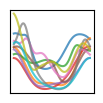

In [6]:
def generate_profile_image(figsize, axis_off=False):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    for env_idx in range(50, 60):
        env.initialize_context(env_idx)
        x = np.linspace(-1, 1, 200)
        profile = env.profile_fcn(x)
        ax.plot(x, profile, alpha=0.75)
        env.release_context()
    ax.set_xticks([])
    ax.set_yticks([])
    if axis_off:
        ax.axis("off")
generate_profile_image(figsize=(5.4*0.2, 5.4*0.2))
plt.savefig("generated/mountaincar_profiles.pdf", bbox_inches="tight")

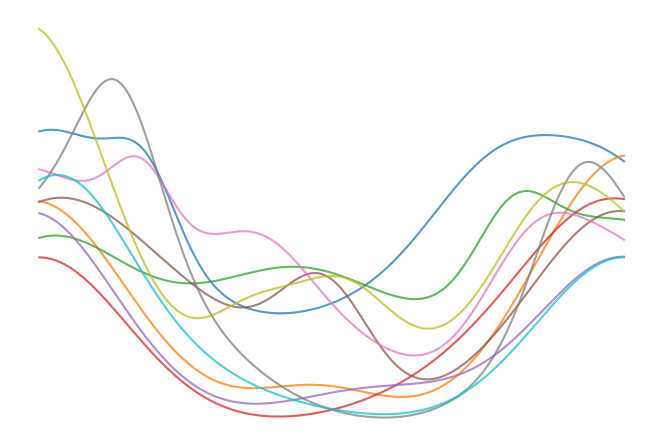

In [7]:
# Generate profiles in higher resolution for presentation
generate_profile_image(figsize=(8.3, 5.55), axis_off=True)
plt.savefig("generated/mountaincar_profiles_highres.pdf", bbox_inches="tight")